Observe Top Values For each Model

In [2]:
import pandas as pd

In [3]:
metrics_df = pd.read_csv("data\metrics_df.csv")

In [4]:
metrics_df.head()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
0,['specialty_index'],0.306783,0.125540,0.028265,Random Forest
1,"['specialty_index', 'city_index']",0.244156,0.129133,0.030981,Random Forest
2,"['total_claim_count', 'total_drug_cost', 'spec...",0.580601,0.091798,0.017154,Random Forest
3,"['total_claim_count', 'total_drug_cost', 'spec...",0.600248,0.089746,0.016322,Random Forest
4,"['total_claim_count', 'total_drug_cost', 'medi...",0.599931,0.089663,0.016374,Random Forest


In [5]:
indices = []
for features in range(len(metrics_df)):
    if len(metrics_df.loc[features][0].split(",")) > 7:
        indices.append(features)

In [6]:
metrics_df.drop(indices, inplace = True)

In [7]:
Top_Scores = metrics_df.sort_values("R Squared").groupby("Model").last()

In [14]:
Top_Scores.sort_values("R Squared", ascending = False, inplace = True)
Top_Scores.head()

,Input,R Squared,Mean Absolute Error,Mean Squared Error
Model,,,,
Random Forest,"['specialty_description', 'nppes_provider_city...",0.684917,0.078650,0.012885
Neural Network,"['specialty_description', 'nppes_provider_city...",0.622714,0.087876,0.015452
K Nearest,"['specialty_description', 'nppes_provider_city...",0.552332,0.094006,0.018182
Lasso Linear,"['specialty_description', 'nppes_provider_city...",0.259210,0.132228,0.030270


In [11]:
Top_Scores.to_csv("Top_Scores.csv")

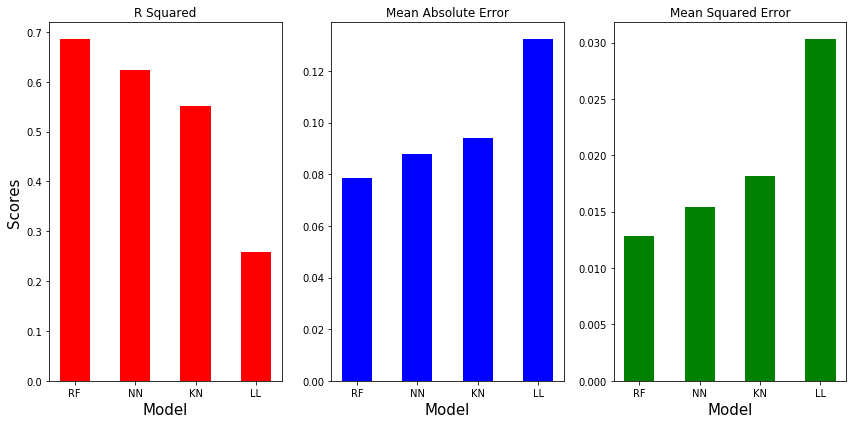

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# create plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,6))
index = np.arange(4)
bar_width = 0.5
opacity = 0.8

ax1.bar(index, Top_Scores["R Squared"].tolist(), bar_width, color = "red")
ax1.set_title('R Squared')
ax1.set_xlabel('Model', fontsize = 15)
ax1.set_ylabel('Scores', fontsize = 15)
ax1.set_xticklabels(["","RF", "NN", "KN", "LL"])


ax2.bar(index, Top_Scores["Mean Absolute Error"].tolist(), bar_width, color = "blue")
ax2.set_title('Mean Absolute Error')
ax2.set_xlabel('Model', fontsize = 15)

ax2.set_xticklabels(["","RF", "NN", "KN", "LL"])

ax3.bar(index, Top_Scores["Mean Squared Error"].tolist(), bar_width, color = "green")
ax3.set_title('Mean Squared Error')
ax3.set_xlabel('Model', fontsize = 15)

ax3.set_xticklabels(["","RF", "NN", "KN", "LL"])

fig.tight_layout()

In [39]:
Top_Scores["R Squared"]

Model
Random Forest     0.684917
Neural Network    0.622714
K Nearest         0.552332
Lasso Linear      0.259210
Name: R Squared, dtype: float64